In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ItemSalesReport.csv')

In [3]:
df

,Item_Name,SKU,GMV,Units_Sold,Orders,Offer_Pageviews,Offer_Conversion,Item_id,Base_Item_Id,Item_Pageviews,...,Auth_Sales,Cancelled_Sales,Refund_Sales,Department,Brand,Listing_Quality_Score,GMV_Minus_Commission,AUR,Cancelled_Units,Item_Condition
0,Pre-Owned Dell Optiplex 3020 Desktop Tower Com...,ZD4-0I79-V74,145.10,1,1,1,100.000000,444470053,444470053.0,1,...,145.10,0.0,0.00,TABLETS,Dell,100.000000,136.39,145.100000,0,Pre-Owned: Good
1,"Dell Optiplex 790 Tower Computer PC, 3.20 GHz ...",WI1-9V68-A71,149.34,1,1,1,100.000000,619543639,619543639.0,6,...,149.34,0.0,0.00,COMPUTING,Dell,100.000000,140.38,149.340000,0,New
2,Windows 11 Pro Dell OptiPlex 9020 Desktop Comp...,OH2-1X16-O20,11084.31,70,100,4325,2.381503,884308220,884308220.0,7940,...,16223.94,485.7,4653.93,COMPUTING,Dell,34.361307,10418.57,159.058235,3,New
3,Pre-Owned Used Fast HP 8200 Desktop Computer T...,NM3-0W64-R90,0.00,0,0,0,NaN,646595850,646595850.0,0,...,0.00,0.0,0.00,TABLETS,HP,0.000000,0.00,NaN,0,Pre-Owned: Good
4,Restored Dell Micro Desktop Computer OptiPlex ...,92G-7KS-J63,0.00,0,0,4,0.000000,552306134,552306134.0,52,...,0.00,0.0,0.00,TABLETS,Dell,60.106916,0.00,NaN,0,Restored: Like New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,"Dell Optiplex 990 Desktop Computer PC, 3.20 GH...",9UL-31UK-H9N,182.94,1,1,0,NaN,108848918,108848918.0,0,...,182.94,0.0,0.00,COMPUTING,Dell,100.000000,171.96,182.940000,0,New
1534,"HP Elite 8100 Tower PC, Intel Core i5 1st Gen,...",WNX-XFX-7TXV,0.00,0,0,0,NaN,489999931,489999931.0,0,...,0.00,0.0,0.00,COMPUTING,HP,0.000000,0.00,NaN,0,New
1535,"Dell OptiPlex 7010 Desktop Computer, Intel Cor...",26Z-A61-Y4K,116.90,1,1,6,16.666667,49122965,49122965.0,6,...,116.90,0.0,0.00,TABLETS,Dell,0.000000,109.89,116.900000,0,New
1536,Dell Optiplex 7010 Desktop Core i5 3.3Ghz 8GB ...,46R-FJ3T-KZA,0.00,0,0,0,NaN,898422715,898422715.0,0,...,0.00,0.0,0.00,COMPUTING,Dell,71.428574,0.00,NaN,0,New


In [5]:
df["cancellation_Rate"]=df["Cancelled_Units"]/df["Orders"]
df["Refund_Rate"]=df["Refund_Sales"]/df["Orders"]

In [6]:
#thresholding
low_sales_threshold=50
high_cancellation_threshold=0.1
high_return_threshold=0.05

#filter problematic skus
problematic=df[
    (df["Units_Sold"]<low_sales_threshold) |
    (df["cancellation_Rate"]>high_cancellation_threshold) |
    (df["Refund_Rate"]>high_return_threshold)
]

In [7]:
#export to csv
problematic.to_csv('problematic_skus.csv', index=False)

In [8]:
#top 10 worst skus by cancellation rate
top_cancellations=df.sort_values(by="cancellation_Rate", ascending=False).head(10)
top_cancellations


,Item_Name,SKU,GMV,Units_Sold,Orders,Offer_Pageviews,Offer_Conversion,Item_id,Base_Item_Id,Item_Pageviews,...,Refund_Sales,Department,Brand,Listing_Quality_Score,GMV_Minus_Commission,AUR,Cancelled_Units,Item_Condition,cancellation_Rate,Refund_Rate
1166,Pre-Owned Used Dell OptiPlex 3010-SFF Desktop ...,TE1-8C45-B12,-117.25,-1,0,0,NaN,188353673,1.883537e+08,0,...,0.0,TABLETS,Dell,0.000000,-110.21,NaN,1,New,inf,NaN
648,Pre-Owned Dell OptiPlex 3010 Tower Desktop Com...,HAG-B3H-LRV,-120.13,-1,0,0,NaN,152190449,1.521904e+08,0,...,0.0,TABLETS,Dell,0.000000,-112.92,NaN,1,New,inf,NaN
266,Restored HP G1 Desktop Computer Core i5 CPU up...,1MP-P2J-HA90,-120.66,-1,0,0,NaN,1653025485,1.653025e+09,0,...,0.0,TABLETS,HP,0.000000,-113.42,NaN,1,Restored: Like New,inf,NaN
1426,Restored HP G1 Desktop Computer Core i5 CPU up...,SK0-03E-TK3D,-144.73,-1,1,0,NaN,1744907905,1.744908e+09,35,...,0.0,TABLETS,HP,0.000000,-136.05,144.73,2,Restored: Like New,2.0,0.0
916,Restored Dell OptiPlex 7010 Desktop PC with In...,XTM-Q2V-XUN,0.00,0,1,0,NaN,52030503,5.203050e+07,10,...,0.0,TABLETS,Dell,0.000000,0.00,103.30,2,Restored: Like New,2.0,0.0
1196,"Dell Optiplex 990 Desktop Computer PC, 3.20 GH...",63O-K360-HOV,0.00,0,1,2,50.0,238197935,2.381979e+08,3,...,0.0,COMPUTING,Dell,50.000000,0.00,198.38,1,New,1.0,0.0
1206,Restored Windows 11 Pro 64bit Fast HP 8200 Des...,UE1-1N94-U74,0.00,0,1,0,NaN,314727194,3.147272e+08,7,...,0.0,TABLETS,HP,0.000000,0.00,160.64,1,Restored: Good,1.0,0.0
1011,Lenovo Desktop Computer 16GB/512SSD Core i5 Wi...,YH4-8B79-Q40,0.00,0,1,1,100.0,181805159,1.818052e+08,3,...,0.0,COMPUTING,Lenovo,64.385216,0.00,195.88,1,New,1.0,0.0
1050,"Restored Dell Desktop Tower Computer, Intel Co...",EVO-TV33-F17M,0.00,0,1,1,100.0,334868075,3.348681e+08,3,...,0.0,TABLETS,Dell,50.000000,0.00,144.90,1,Restored: Like New,1.0,0.0
998,"Restored DELL Optiplex 9020 Tower Computer PC,...",UAF-FBR-HCVN,128.00,1,1,8,12.5,311926980,3.119270e+08,16,...,0.0,TABLETS,Dell,33.333333,120.32,64.00,1,Restored: Like New,1.0,0.0


In [9]:
#top 10 worst skus by return rate
top_returns=df.sort_values(by="Refund_Rate", ascending=False).head(10)
top_returns

,Item_Name,SKU,GMV,Units_Sold,Orders,Offer_Pageviews,Offer_Conversion,Item_id,Base_Item_Id,Item_Pageviews,...,Refund_Sales,Department,Brand,Listing_Quality_Score,GMV_Minus_Commission,AUR,Cancelled_Units,Item_Condition,cancellation_Rate,Refund_Rate
1475,Restored Dell OptiPlex 7010 - DT - Core i7 377...,FGX3-31DU-Z4DQ3,0.00,0,0,0,NaN,589421066,5.894211e+08,0,...,300.05,TABLETS,Dell,0.000000,0.00,300.05,0,Restored: Like New,NaN,inf
1384,Used: Dell OptiPlex 3020 Desktop Computer - In...,AIQ-H4M-QUI,-108.79,-1,0,0,NaN,376204632,3.762046e+08,0,...,108.79,TABLETS,Dell,0.000000,-102.26,NaN,0,Restored: Like New,NaN,inf
1393,"Dell Optiplex 990 Tower Computer PC, 3.20 GHz ...",WJI-W71J-QN5,-169.05,-1,0,0,NaN,823412221,8.234122e+08,0,...,169.05,COMPUTING,Dell,0.000000,-169.05,NaN,0,New,NaN,inf
1235,"Dell OptiPlex 7040 SFF Desktop PC, Core i5-650...",306A-KHD2-UR2JT,-153.72,-1,0,0,NaN,1839072980,1.839073e+09,0,...,153.72,TABLETS,Dell,0.000000,-142.91,NaN,0,New,NaN,inf
1184,Pre-Owned DELL OptiPlex 7010 Desktop Computer ...,9TWO-HBJ-FO4XJ,-181.37,-1,0,1,0.0,2013352688,2.013353e+09,1,...,181.37,TABLETS,Dell,32.569769,-170.49,NaN,0,Pre-Owned: Like New,NaN,inf
1154,"Dell Optiplex 3020 Desktop Computer, Intel Cor...",JVR-L2IG-EAK,-187.18,-1,0,0,NaN,228579625,2.285796e+08,0,...,187.18,COMPUTING,Dell,0.000000,-175.95,NaN,0,New,NaN,inf
116,Restored Dell OptiPlex 9020 Desktop Computer B...,XV2-0Z13-X60,-193.90,-1,0,0,NaN,539366039,5.393660e+08,0,...,193.90,TABLETS,Dell,0.000000,-182.27,NaN,0,Restored: Like New,NaN,inf
1276,Pre-Owned Dell PC Computer Desktop CORE i5 3.0...,RN6-2P43-V95,-209.36,-1,0,0,NaN,608490640,6.084906e+08,3,...,209.36,TABLETS,Dell,52.186604,-196.80,NaN,0,Pre-Owned: Good,NaN,inf
73,Restored DELL Optiplex 7010 Desktop Computer P...,AW6-9Q13-P43,-131.36,-1,0,0,NaN,608984349,6.089843e+08,2,...,131.36,TABLETS,Dell,10.884371,-131.36,NaN,0,Restored: Like New,NaN,inf
1348,Desktop PC LENOVO 2TB Core i5 16GB RAM WiFi WI...,RB7-8W23-O72,-186.65,-1,0,0,NaN,268708837,2.687088e+08,0,...,186.65,COMPUTING,Lenovo,0.000000,-175.45,NaN,0,New,NaN,inf


In [15]:
pivot=pd.pivot_table(df,
                     index='SKU',
                     values=['Units_Sold', 'Orders', 'Cancelled_Units', 'Refund_Sales', 'cancellation_Rate', 'Refund_Rate'],
                     aggfunc={'Units_Sold': 'sum', 'Cancelled_Units': 'sum', 'cancellation_Rate': 'mean', 'Refund_Sales': 'sum', 'Refund_Rate': 'mean', 'Orders': 'sum'})
pivot.reset_index(inplace=True)
pivot


,SKU,Cancelled_Units,Orders,Refund_Rate,Refund_Sales,Units_Sold,cancellation_Rate
0,00609411541807,0,0,NaN,0.00,0,NaN
1,00609411559673,0,0,NaN,0.00,0,NaN
2,00609411586686,0,2,0.000000,0.00,2,0.000000
3,00643664077119,0,0,NaN,0.00,0,NaN
4,00671983586487,0,0,NaN,0.00,0,NaN
...,...,...,...,...,...,...,...
1438,ZW1-1AZ-AJ1,0,6,45.963333,275.78,4,0.000000
1439,ZY7-7G41-X67,0,0,NaN,0.00,0,NaN
1440,ZZ3-7I64-R24,2,19,48.703158,925.36,15,0.105263
1441,ZZ9-5J4-QHO,0,0,NaN,0.00,0,NaN


In [16]:
#filter problematic skus with high refund or cancellation rates
problematic_pivot=pivot[
    (pivot["cancellation_Rate"]>high_cancellation_threshold) |
    (pivot["Refund_Rate"]>high_return_threshold)
]

In [17]:
# Save to Excel
with pd.ExcelWriter("sku_pivot_report.xlsx") as writer:
    pivot.to_excel(writer, sheet_name="All_SKUs")
    problematic_pivot.to_excel(writer, sheet_name="High_Cancel_Refund")

print("✅ Pivot table saved to sku_pivot_report.xlsx")

✅ Pivot table saved to sku_pivot_report.xlsx


Text(0.5, 1.0, 'SKU Cancellation vs Refund Rates')

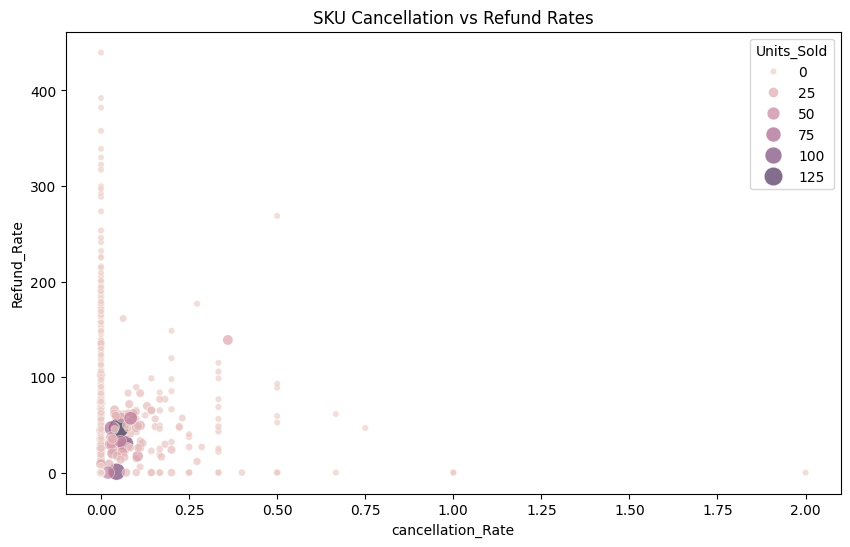

In [18]:
#plot a pivot table
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=pivot, x="cancellation_Rate", y="Refund_Rate", size="Units_Sold", hue="Units_Sold", alpha=0.7, sizes=(20, 200))
plt.title("SKU Cancellation vs Refund Rates")